## Seeding for reproducibillity

In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

## Importing the dependencies

In [ ]:
import os
import json
from zipfile import ZipFile
import PIL as Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers , models

### Data Curation

Upload the kaggle.json file

In [ ]:
! pip install kaggle

In [ ]:
kaggle_credentials = json.load(open("kaggle.json"))

In [ ]:
# setup Kaggle API key as enviormental variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0


In [ ]:
!ls

drive  kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
# Unzip the downloaded datset
with ZipFile("plantvillage-dataset.zip","r") as zip_ref :
  zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['segmented', 'grayscale', 'color']
38
['Tomato___Bacterial_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Squash___Powdery_mildew', 'Tomato___Early_blight', 'Peach___healthy']
38
['Tomato___Bacterial_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Squash___Powdery_mildew', 'Tomato___Early_blight', 'Peach___healthy']
38
['Tomato___Bacterial_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Squash___Powdery_mildew', 'Tomato___Early_blight', 'Peach___healthy']


### Number of classes : 38

In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['12ad3257-385c-43f3-bed7-629d15c7d581___Mt.N.V_HL 6104.JPG', '8bd312c9-5a9c-4ac7-ae60-cbc2600a23aa___Mt.N.V_HL 6128.JPG', 'feb2cf1a-1903-4fb8-bc99-4b399346fef0___Mt.N.V_HL 6135.JPG', '72cd93bf-63f6-476a-b3ae-43af2006c9f2___Mt.N.V_HL 6132.JPG', 'bd7f0429-550b-4e28-95af-98e56b282437___Mt.N.V_HL 6130.JPG']


**Data Preprocessing**

In [ ]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


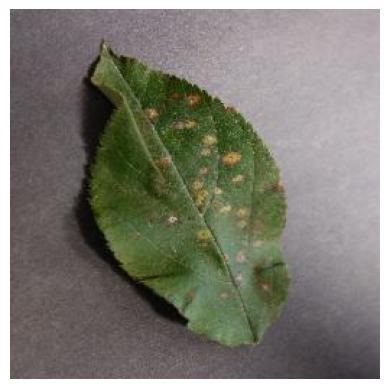

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/04da297e-5238-41b1-a8a0-0c87c6c2f21f___FREC_C.Rust 4394.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/04da297e-5238-41b1-a8a0-0c87c6c2f21f___FREC_C.Rust 4394.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[107 101 105]
  [109 103 107]
  [112 106 110]
  ...
  [175 164 170]
  [175 164 170]
  [175 164 170]]

 [[116 110 114]
  [114 108 112]
  [111 105 109]
  ...
  [174 163 169]
  [173 162 168]
  [172 161 167]]

 [[104  98 102]
  [104  98 102]
  [103  97 101]
  ...
  [175 164 170]
  [174 163 169]
  [173 162 168]]

 ...

 [[109  99  98]
  [107  97  96]
  [101  91  90]
  ...
  [ 70  65  71]
  [ 71  66  72]
  [ 71  66  72]]

 [[104  94  93]
  [101  91  90]
  [ 99  89  88]
  ...
  [ 68  63  69]
  [ 68  63  69]
  [ 68  63  69]]

 [[101  91  90]
  [ 98  88  87]
  [101  91  90]
  ...
  [ 67  62  68]
  [ 67  62  68]
  [ 67  62  68]]]


In [ ]:
# Image parameters
img_size = 224
batch_size = 32

Train Test Split

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale = 1./255 ,
    validation_split = 0.2
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir ,
    target_size = (img_size , img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


Found 43456 images belonging to 38 classes.

In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir ,
    target_size = (img_size , img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


Found 10849 images belonging to 38 classes.

### Convolutional Neural Network

In [ ]:
# Model Defination
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))

In [ ]:
# Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

### Model training

In [ ]:
# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    epochs = 5 ,
    validation_steps = validation_generator.samples // batch_size
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 127s 88ms/step - accuracy: 0.6192 - loss: 1.5925 - val_accuracy: 0.8585 - val_loss: 0.4458
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.9173 - loss: 0.2648 - val_accuracy: 0.8551 - val_loss: 0.4594
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 140s 81ms/step - accuracy: 0.9617 - loss: 0.1177 - val_accuracy: 0.8854 - val_loss: 0.4331
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 148s 85ms/step - accuracy: 0.9770 - loss: 0.0696 - val_accuracy: 0.8255 - val_loss: 0.7640
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 137s 81ms/step - accuracy: 0.9777 - loss: 0.0677 - val_accuracy: 0.8827 - val_loss: 0.4955


### Model Evaluation

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.8807 - loss: 0.5063
Validation Accuracy: 88.28%


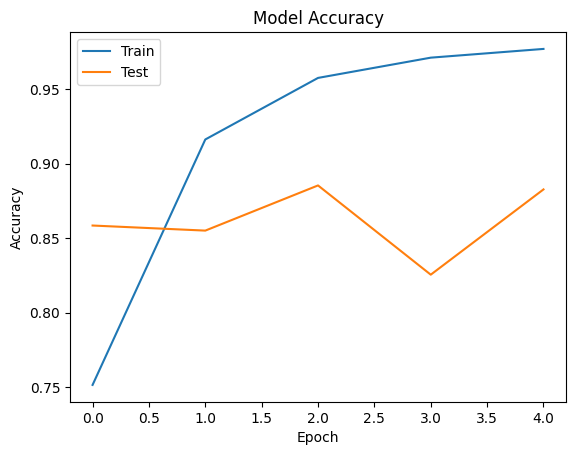

In [ ]:
# Plot the training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

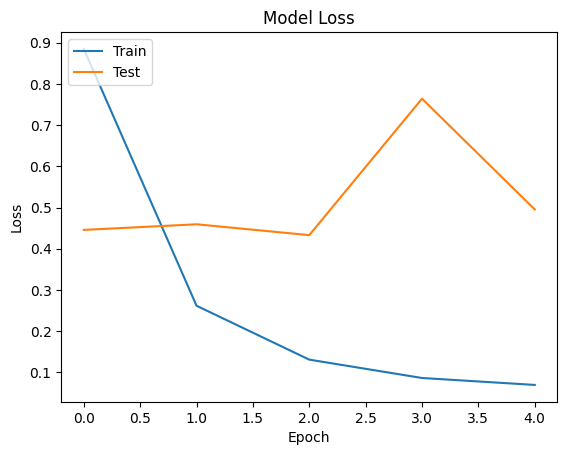

In [ ]:
# Plot the training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Building a Predictive System

In [ ]:
# Function the load and preprocess the Image using Pillow

def load_and_preprocess_image(image_path , target_size = (224,224)):

  # Load the Image
  img = Image.open(image_path)

  # Resize the Image
  img = img.resize(target_size)

  # Convert the image to a numpy array
  img_array = np.array(img)

  # Add batch dimension
  img_array = np.expand_dims(img_array , axis=0)

  # Scale the image values to [0,1]
  img_array = img_array.astype('float32') / 255.

  return img_array

In [ ]:
# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Creating a mapping from class indices to class names
class_indices = {v: k for k , v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Example Usage
#image_path = '/content/plantvillage dataset/color/Apple___healthy/0098dbd9-286a-4d6a-bf4b-5459d66f88c0___RS_HL 5776.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
image_path = '/content/plantvillage dataset/color/Grape___Esca_(Black_Measles)/01162551-b800-4df8-ac46-64d17d6ac5bf___FAM_B.Msls 1153.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Class Name: Grape___Esca_(Black_Measles)


In [ ]:
# Save the model to Google Drive
model.save('/content/drive/MyDrive/plant_disease_prediction_model.h5')